> **Acquire Data**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

### For data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib.inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#### Reading Training dataset

In [ ]:
# Load the train and Display the First 5 Rows of Titanic Dataset
train = pd.read_csv("../input/titanic-solution-for-beginners-guide/train.csv")
train.head()

#### Reading Training Dataset

In [ ]:
# Load the test and Display the First 5 Rows of Titanic Dataset
test = pd.read_csv("../input/titanic-solution-for-beginners-guide/test.csv")
test.head()

#### Combine training and testing data****

In [ ]:
combine = [train,test]

#### Number of Rows and column in training dataset

In [ ]:
print('Number of Rows and column in training dataset',train.shape)
print('Number of Rows and column in testing dataset',test.shape)

##### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

#### Which features are available in the dataset?

In [ ]:
print('Training columns : ')
print(train.columns.values)
print('Testing columns : ')
print(test.columns.values)

#### Which is the target Column ?[](http://)

In [ ]:
target_variable = list(set(train) - set(test))
print('Target Column is :',target_variable)

## Feature Data Type:
    1. Numerical:
        a. Continuos
        b. Discrete
    2. Categorical:
        a. Nominal
        b. Ordinal

In [ ]:
train.info()

#### Inference : By seeing the above feature information we can infer we have 2 float Features , Integer Feature 5 and Categorical feature 5.

Missing Values: We can also see the count of Age(714) , Cabin(204) and Embarked(889) column is less as compared to other columns. that means it contain some missing value

In [ ]:
# select_dtypes : Return a subset of the DataFrame’s columns based on the column dtypes.

#it will return column which contain discrete (integer) value  
discrete_data = train.select_dtypes(include=['int64'])
#it will return column which contain continous (float) value
continous_data = train.select_dtypes(include=['float64'])
#it will return column which contain categorical (object) value
categorical_data = train.select_dtypes(include=['object'])

In [ ]:
print('Discrete Features : ',discrete_data.columns.values)
print('Continous Features : ',continous_data.columns.values)
print('Categorical Features : ',categorical_data.columns.values)

In [ ]:
categorical_data.head()

1. Cabin and Ticket Contain Mixed datatype (numerical + textual) information

In [ ]:
discrete_data.tail()

In [ ]:
continous_data.head()

#### Which Feature may contain errors

In [ ]:
train.head()

In [ ]:
train.tail()

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

#### Which Feature Contain Blank values ?
These will require correcting.


#### Training dataset

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='bwr')

In [ ]:
train.info()

> Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

#### Testing dataset

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='bwr')

In [ ]:
train.info()
print('--'*40)
test.info()

Cabin > Age >Fare Contain number of null values in that order for testing dataset

### Describing the Data

#### Complete training data

In [ ]:
train.describe()

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
* Most Passenger (>75%) did not travel with parents or children
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Fare vary significatly for few passengers paying as high as $512

#### Categorical Description

In [ ]:
categorical_data.describe()

What is the distribution of categorical features?

* Names are unique across the dataset
* Sex variable has two possible values with 65% male
* Embarked takes three possible values. S port used by most passengers (top=S) i.e. Most Passenger has started their jouney from SouthHampton
* Cabin contain several unique values also it several passenger has shared the cabin
* Ticket has high ratio of duplicate values

#### Discreate description

In [ ]:
discrete_data.describe()

In [ ]:
continous_data.describe()

In [ ]:
from numpy import percentile
from numpy.random import rand

print('Sibling Ratio : ',percentile(train['SibSp'],[10, 20, 30, 40, 50, 60,65,68, 70, 80, 90]))
print('Fare Charge : ',percentile(train['Fare'],[10, 20, 30, 40, 50, 60,70, 80, 90,95,99]))

* Nearly 32% of the passenger had the spouse and siblings
* Less than 2% of the passenger had paid more fares****

### Assumption based on the data analysis:
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions 
further before taking appropriate actions.
#### 1.Correlation :
* We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

#### 2.Correcting : 
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

#### 3. Creation :
* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis

#### 4. Classification : 
We may also add to our assumptions based on the problem description noted earlier.

* Women / Men were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* Which  passengers class (Pclass=1 , 2, 3 ) were more likely to have survived.

### Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [ ]:
train['Pclass'].value_counts()

In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

> Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

In [ ]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [ ]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#### This Features (Parch and SibSp) have zero correlation for certain values. it may be best to derive a new feature from a feature or set of feature from these individual features

In [ ]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

> Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

### Analyze by visualizing the data
Now we can continue confirming some assumption using visualization for analyzing the data

#### Correlating Numerical Feature

Let us start by understanding correlation between numerical feature and our soultion goal Survived (Categorical variable)

A histrogram chart is useful for analyzing the continous numerical feature like **Age : where banding or ranges will be useful to identify the patterns**  The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

In [ ]:
grid1 =sns.FacetGrid(train,col='Survived')
grid1.map(plt.hist, 'Age', bins=20)

#### Observation:
* Infrant(Age<=4) had high survival rate
* Oldest Passenger 80 is Survived.
* Large Number of of people between 16-28 did not Survived
* Most Passenger are in th range of 15-3%5

#### Decision:
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

* We should consider the Age Feature in our model training 
* Complete the Age Feature for null values. (Completion 1)
* we should band age groups (Creation 3)


#### Correlating numerical and ordinal features


We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

In [ ]:
grid2 = sns.FacetGrid(train,col='Survived',row='Pclass')
grid2.map(plt.hist,'Age',alpha=0.5,bins=20)
grid2.add_legend()

#### Observations:
* Pclass=3 Had most passenger,however they didn't survived.Confirm Classifying Assumption
* Infrant Passenger in Pclass=2 and Pclass=3. mostly survived.Further qualifies for classification.
* Most Passenger in Pclass=1 has Survived. Confirm Classifying assumption 3
* Pclass varies in terms of Age Distribution

#### Decision:
* Consider Pclass for Modelling

#### Correlating categorical features
Now we can correlate categorical features with our solution goal.



In [ ]:
grid2 = sns.FacetGrid(train,row='Embarked' , size=5.2, aspect=1.6)
grid2.map(sns.pointplot,'Pclass','Survived','Sex', palette='deep')
grid2.add_legend()


In [ ]:
grid2 = sns.FacetGrid(train,row='Embarked',col='Survived',size=3.0,aspect=2.0)
grid2.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid2.add_legend()

#### Observations.
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

#### Decisions.

Add Sex feature to model training.
Complete and add Embarked feature to model training.

## Data Wrangling

#### Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [ ]:
print('Before : ',train.shape,test.shape)
columns = ['Cabin','Ticket']
new_train = train.drop(columns,axis=1)
new_test = test.drop(columns,axis=1) 
combine = [new_train,new_test]
print('After : ',new_train.shape,new_test.shape)

In [ ]:
new_train.head()

Creating new feature extracting from existing We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features. In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title'].head()

In [ ]:
pd.crosstab(new_train['Title'],new_train['Sex'])

In [ ]:
new_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

We can replace many titles with a more common name or classify them as Rare.


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Major','Rev','Sir','Dona','Lady'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
new_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

### We can convert the categorical titles to ordinal.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

new_train.head()

Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [ ]:
new_train = new_train.drop(['Name', 'PassengerId'], axis=1)
new_test = new_test.drop(['Name'], axis=1)
combine = [new_train, new_test]
new_train.shape, new_test.shape

Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"male" : 0 , "female" : 1}).astype(int)

new_train.head()

In [ ]:
new_train.info()

Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [ ]:
grid = sns.FacetGrid(new_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess =  guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
new_train.head()

In [ ]:
new_train.info()

In [ ]:
new_train['AgeBand'] = pd.cut(new_train['Age'], 5)
new_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
new_train.head()

In [ ]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age'] <=32),'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age']>38) & (dataset['Age'] <=64),'Age'] = 3
    dataset.loc[(dataset['Age']>64), 'Age'] = 4

In [ ]:
new_train.head()

In [ ]:
new_test.head()

#### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.



In [ ]:
for dataset in combine:
    dataset['Familysize'] = dataset['Parch'] + dataset['SibSp'] + 1
new_train[['Familysize', 'Survived']].groupby(['Familysize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Familysize'] == 1,'IsAlone'] = 1

In [ ]:
new_train[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.



In [ ]:
new_train = new_train.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
new_test = new_test.drop(['Parch', 'SibSp', 'Familysize'], axis=1)


In [ ]:
combine = [new_train, new_test]

new_train.head()

In [ ]:
for dataset in combine:
    dataset['Age*class'] = dataset.Age * dataset.Pclass
new_train.loc[:,['Age*class','Age','Pclass']].head()

#### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [ ]:
freq_port = new_train.Embarked.dropna().mode()[0]
freq_port

In [ ]:
dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
new_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#### Converting Categorical Feature to numerical
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.


In [ ]:
for dataset in combine:
    print(dataset.info())
    print(dataset.dropna(how='any',inplace=True))
    print(dataset.info())

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()  

In [ ]:

for dataset in combine:
    dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])

In [ ]:
dataset['Embarked'].unique() 


In [ ]:
new_train.head()

#### Quick completing and converting a numeric feature¶
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [ ]:
new_test['Fare'].fillna(new_test['Fare'].dropna().median(), inplace=True)
new_test.head()

We can not create FareBand.



In [ ]:
new_train['FareBand'] = pd.qcut(new_train['Fare'], 4,duplicates='drop')
new_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

new_train = new_train.drop(['FareBand','AgeBand'], axis=1)
combine = [new_train, new_test]
    
new_train.head(10)

## Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

1. Logistic Regression
2. Decision Tree Classfier
3. Random Forest Classifer
4. Navie Bayes
5. KNN (K Nearest Neighbour)
6. SVM (Support Vector Machine)
7. Artifical Neural Network
8. Perceptron
9. Relevance Vector Machine (RVM)
10. Perceptron

In [ ]:
X_train = new_train.drop("Survived", axis=1)
Y_train = new_train["Survived"]
X_test  = new_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

## 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)
### Check the training accuracy
training_accuracy = logistic_model.score(X_train,Y_train)
y_pred = logistic_model.predict(X_test)
acc_log = round((training_accuracy)*100,2)
print('Training Accuracy For the Logistic Regression Model is ',acc_log)

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).



In [ ]:
### Coeffecient of each feature
coeff_df = pd.DataFrame(new_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logistic_model.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
* So is Title as second highest positive correlation.

## Logistic Regression:
**Advantages** :
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

**Disadvantages** : 
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## 2.Support Vector Machine 

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

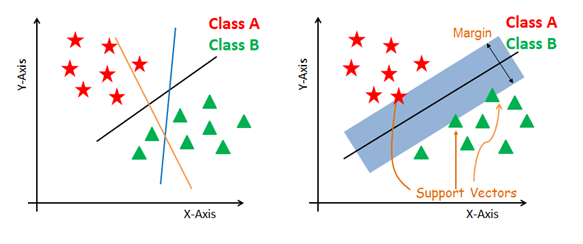

**Support Vectors**
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


**How does SVM work?**
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.
1. enerate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.
2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

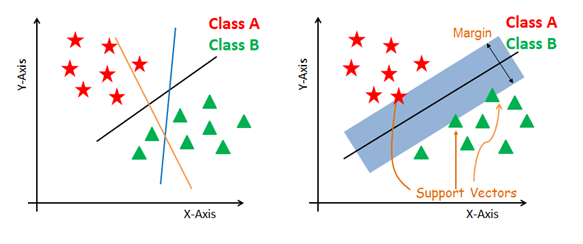





In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,Y_train)
acc_svc = round(svc_model.score(X_train,Y_train) * 100 ,2)
print('Training Accuracy For the SVC Model ',acc_svc)
y_pred = svc_model.predict(X_test)

### Tuning Hyperparameters

**1.Kernel**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

**2.Regularization**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

**3.Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

### Advantages
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

### Disadvantages
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

## 3.K-Nearest Neighbor(KNN) Classification 

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.



KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.



## **How does the KNN algorithm work?**
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

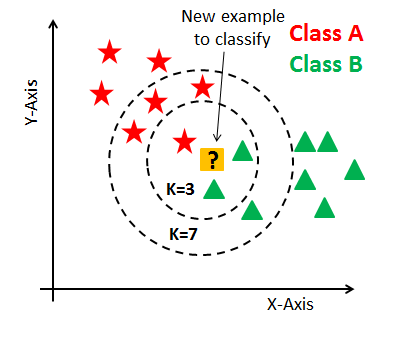

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels

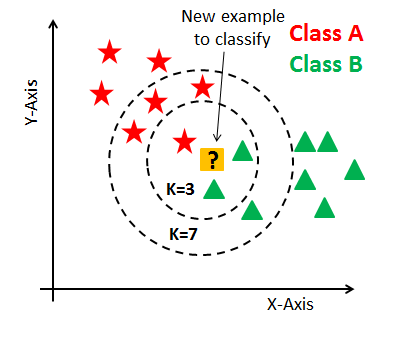

#### Eager Vs. Lazy Learners
Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.

Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

#### Curse of Dimensionality
KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

#### How do you decide the number of neighbors in KNN?
Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.

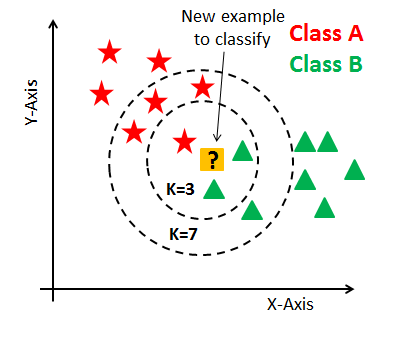

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('Training Accuracy For the KNN Neighbour is ',acc_knn)

Well, you got a classification rate of 84.06%, considered as good accuracy.

Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy. For a more detailed understanding of it, you can refer section "How to decide the number of neighbors?" of this tutorial.

**Pros**
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

**Cons**
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

How to improve KNN?
For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

## 4.Naive Bayes

Suppose you are a product manager, you want to classify customer reviews in positive and negative classes. Or As a loan manager, you want to identify which loan applicants are safe or risky? As a healthcare analyst, you want to predict which patients can suffer from diabetes disease. All the examples have the same kind of problem to classify reviews, loan applicants, and patients.

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.



Whenever you perform classification, the first step is to understand the problem and identify potential features and label. Features are those characteristics or attributes which affect the results of the label. For example, in the case of a loan distribution, bank manager's identify customer’s occupation, income, age, location, previous loan history, transaction history, and credit score. These characteristics are known as features which help the model classify customers.

The classification has two phases, a learning phase, and the evaluation phase. In the learning phase, classifier trains its model on a given dataset and in the evaluation phase, it tests the classifier performance. Performance is evaluated on the basis of various parameters such as accuracy, error, precision, and recall.


#### What is Naive Bayes Classifier?
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.


* P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.
* P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.
* P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.
* P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.

**How Naive Bayes classifier works?**
Let’s understand the working of Naive Bayes through an example. Given an example of weather conditions and playing sports. You need to calculate the probability of playing sports. Now, you need to classify whether players will play or not, based on the weather condition.

First Approach (In case of a single feature)
Naive Bayes classifier calculates the probability of an event in the following steps:

* Step 1: Calculate the prior probability for given class labels
* Step 2: Find Likelihood probability with each attribute for each class
* Step 3: Put these value in Bayes Formula and calculate posterior probability.
* Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

For simplifying prior and posterior probability calculation you can use the two tables frequency and likelihood tables. Both of these tables will help you to calculate the prior and posterior probability. The Frequency table contains the occurrence of labels for all features. There are two likelihood tables. Likelihood Table 1 is showing prior probabilities of labels and Likelihood Table 2 is showing the posterior probability.

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,Y_train)
acc_gaussian = round(naive_bayes_model.score(X_train,Y_train)*100,2)
print('Training Accuracy For the Navie Bayes Model is : ',acc_gaussian)
y_pred = naive_bayes_model.predict(X_test)

**Zero Probability Problem:**

Suppose there is no tuple for a risky loan in the dataset, in this scenario, the posterior probability will be zero, and the model is unable to make a prediction. This problem is known as Zero Probability because the occurrence of the particular class is zero.

The solution for such an issue is the Laplacian correction or Laplace Transformation. Laplacian correction is one of the smoothing techniques. Here, you can assume that the dataset is large enough that adding one row of each class will not make a difference in the estimated probability. This will overcome the issue of probability values to zero.

For Example: Suppose that for the class loan risky, there are 1000 training tuples in the database. In this database, income column has 0 tuples for low income, 990 tuples for medium income, and 10 tuples for high income. The probabilities of these events, without the Laplacian correction, are 0, 0.990 (from 990/1000), and 0.010 (from 10/1000)

Now, apply Laplacian correction on the given dataset. Let's add 1 more tuple for each income-value pair. The probabilities of these events:


**Advantages**
1. It is not only a simple approach but also a fast and accurate method for prediction.
2. Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable.
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.

**Disadvantages**
1. The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
2. If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.


## 5.Decision Tree Classifier

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
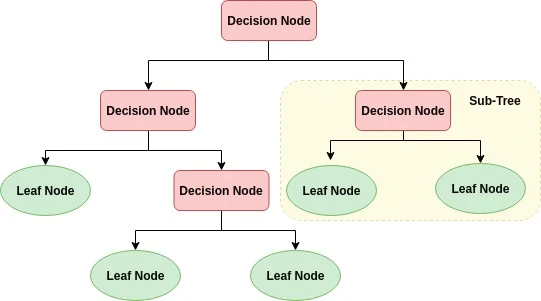
Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.


How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

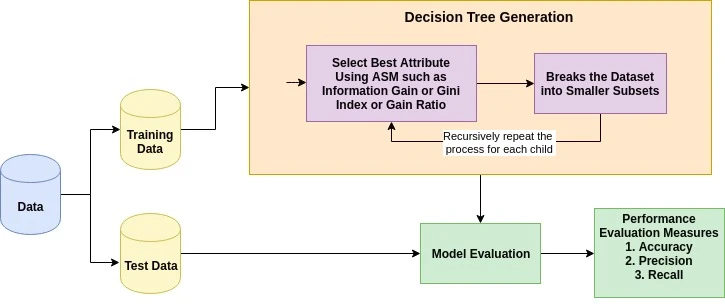

**Attribute Selection Measures**
Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute . In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

**Information Gain**
Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

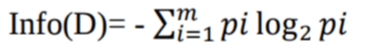

Where, Pi is the probability that an arbitrary tuple in D belongs to class Ci.


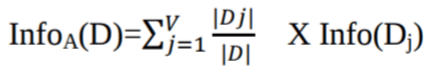


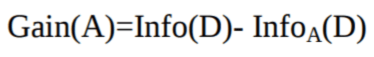
Where,

* Info(D) is the average amount of information needed to identify the class label of a tuple in D.
* |Dj|/|D| acts as the weight of the jth partition.
* InfoA(D) is the expected informa-tion required to classify a tuple from D based on the partitioning by A.
* The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().

**Gain Ratio**
Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48

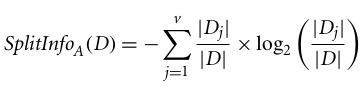

Where,

* |Dj|/|D| acts as the weight of the jth partition.
* v is the number of discrete values in attribute A.

The gain ratio can be defined as

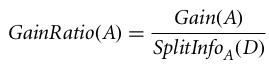

The attribute with the highest gain ratio is chosen as the splitting attribute.

**Gini index**
Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

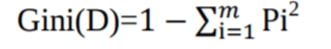

Where, pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

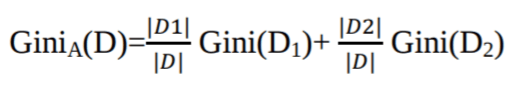

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

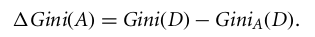

The attribute with minimum Gini index is chosen as the splitting attribute.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Training Accuracy For the Decision Tree Classifier Model is :',acc_decision_tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Training Accuracy For the RandomForestClassifier Model is :',acc_random_forest)

In [ ]:
import xgboost

xgb = xgboost.XGBClassifier(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)

xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
print('Training Accuracy For the XGBoost Model is :',acc_xgb)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
               'Naive Bayes',  
              'Decision Tree','Random Forest','XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_gaussian, acc_decision_tree,acc_random_forest,acc_xgb]})
models.sort_values(by='Score', ascending=False)